In [1]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('cleaned_data.csv')

# Convert the 'DATE' column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

# Sort the data by date (optional but recommended for time series data)
data = data.sort_values('DATE')

# Check for missing values and fill or drop them if needed
# For this case, let's drop rows with missing precipitation or close price
data = data.dropna(subset=['PRECIPITATION', 'CLOSE PRICE'])


In [5]:
# Filter for the training set (2002 to 2021)
#train_data = data[(data['DATE'].dt.year >= 2002) & (data['DATE'].dt.year <= 2023)]

# Filter for the testing set (2022 to 2024)
#test_data = data[(data['DATE'].dt.year >= 2023) & (data['DATE'].dt.year <= 2024)]

# Filter for the training set (2002 to 2023)
train_data = data[(data['DATE'].dt.year >= 2002) & (data['DATE'].dt.year <= 2023)]

# Filter for the testing set (2024 only)
test_data = data[data['DATE'].dt.year == 2024]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Prepare the training and testing data
X_train = train_data[['PRECIPITATION']]  # Independent variable (precipitation)
y_train = train_data['CLOSE PRICE']     # Dependent variable (close price)

X_test = test_data[['PRECIPITATION']]   # Independent variable (precipitation)
y_test = test_data['CLOSE PRICE']      # Actual close price for testing

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

Mean Absolute Error: 282.4713396367282
R-squared: -35.18988538642002


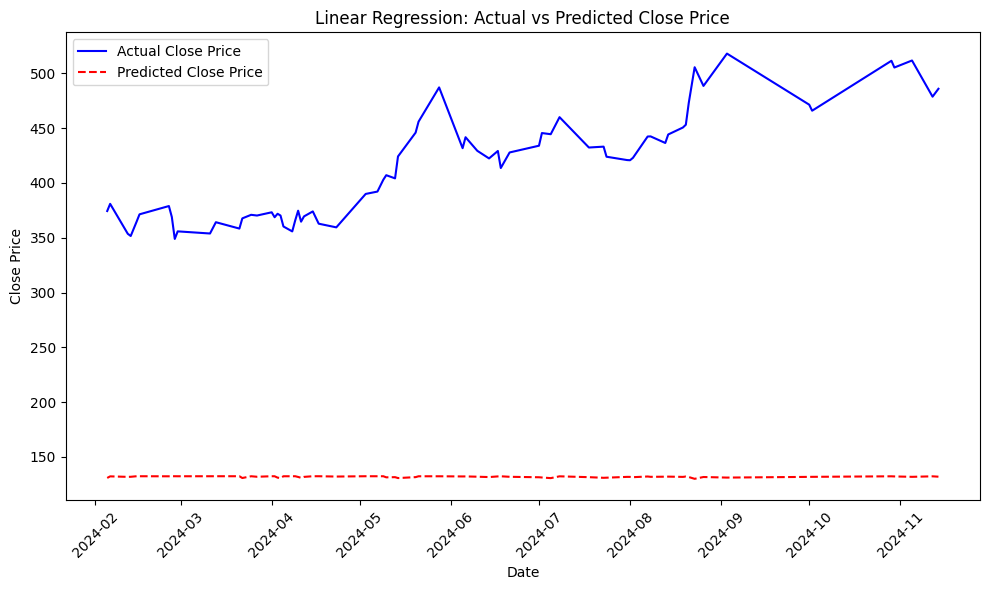

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test_data['DATE'], y_test, label='Actual Close Price', color='blue')
plt.plot(test_data['DATE'], y_pred, label='Predicted Close Price', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression: Actual vs Predicted Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): 190.46882729952299
R-squared (R²): -3.71374512273177


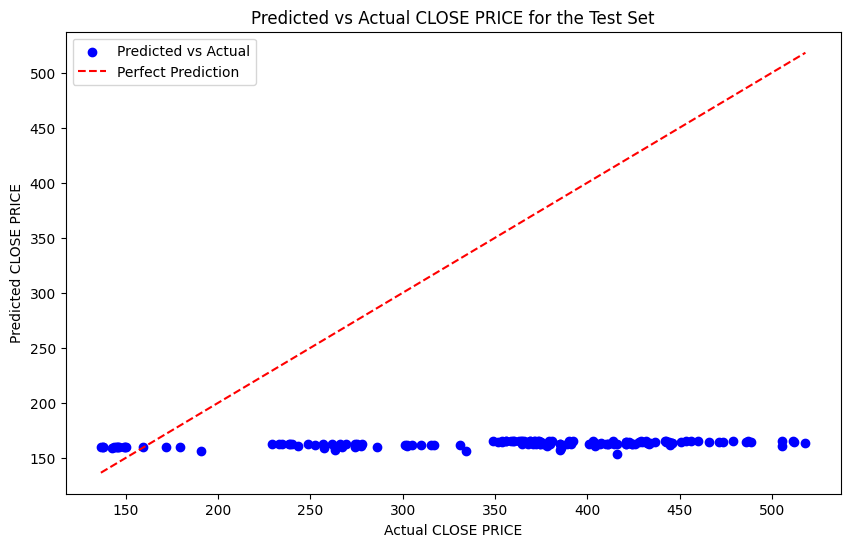

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the combined data
data = pd.read_csv('combined_data.csv')

# Convert the 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

# Step 2: Split the data into training (2002-2021) and testing (2022-2024) sets
train_data = data[data['DATE'].dt.year <= 2021]
test_data = data[data['DATE'].dt.year >= 2022]

# Step 3: Define the features (X) and target (y)
X_train = train_data[['PRECIPITATION', 'LOSS AREA']]
y_train = train_data['CLOSE PRICE']

X_test = test_data[['PRECIPITATION', 'LOSS AREA']]
y_test = test_data['CLOSE PRICE']

# Step 4: Build the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Step 5: Apply the model to the test data
y_pred = model.predict(X_test)

# Step 6: Measure model performance
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Step 7: Plot the results
# Plotting the predicted vs actual CLOSE PRICE for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual CLOSE PRICE')
plt.ylabel('Predicted CLOSE PRICE')
plt.title('Predicted vs Actual CLOSE PRICE for the Test Set')
plt.legend()
plt.show()


Mean Absolute Error (MAE): 190.47843159119944
R-squared (R²): -3.714211110029611


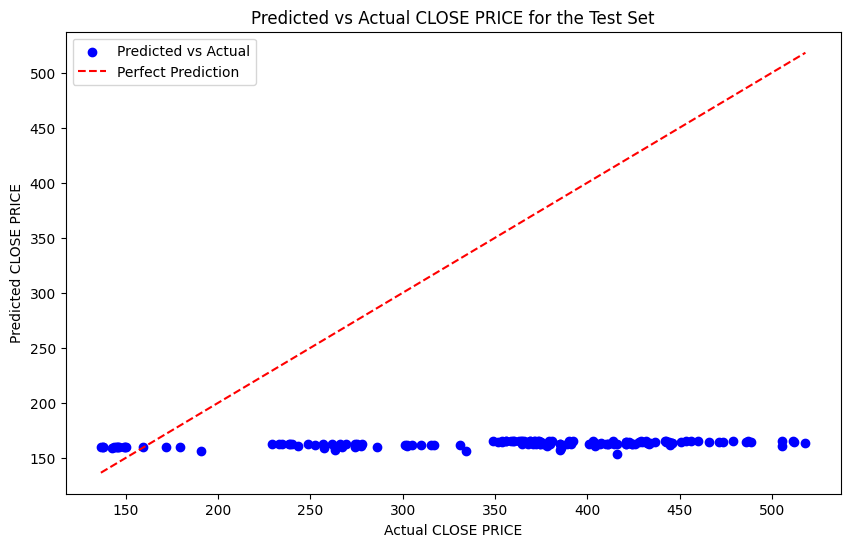

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the combined data
data = pd.read_csv('combined_data.csv')

# Convert the 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

# Step 2: Split the data into training (2002-2021) and testing (2022-2024) sets
train_data = data[data['DATE'].dt.year <= 2021]
test_data = data[data['DATE'].dt.year >= 2022]

# Step 3: Define the features (X) and target (y)
X_train = train_data[['PRECIPITATION', 'LOSS AREA']]
y_train = train_data['CLOSE PRICE']

X_test = test_data[['PRECIPITATION', 'LOSS AREA']]
y_test = test_data['CLOSE PRICE']

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build the Ridge Regression model
model = Ridge(alpha=1.0)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Step 6: Apply the model to the test data
y_pred = model.predict(X_test_scaled)

# Step 7: Measure model performance
mae = mean_absolute_error(y_test, y_pred) # Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Step 8: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual CLOSE PRICE')
plt.ylabel('Predicted CLOSE PRICE')
plt.title('Predicted vs Actual CLOSE PRICE for the Test Set')
plt.legend()
plt.show()


Random Forest MAE: 231.24546103570214
Random Forest R-squared: -5.6554260303404735


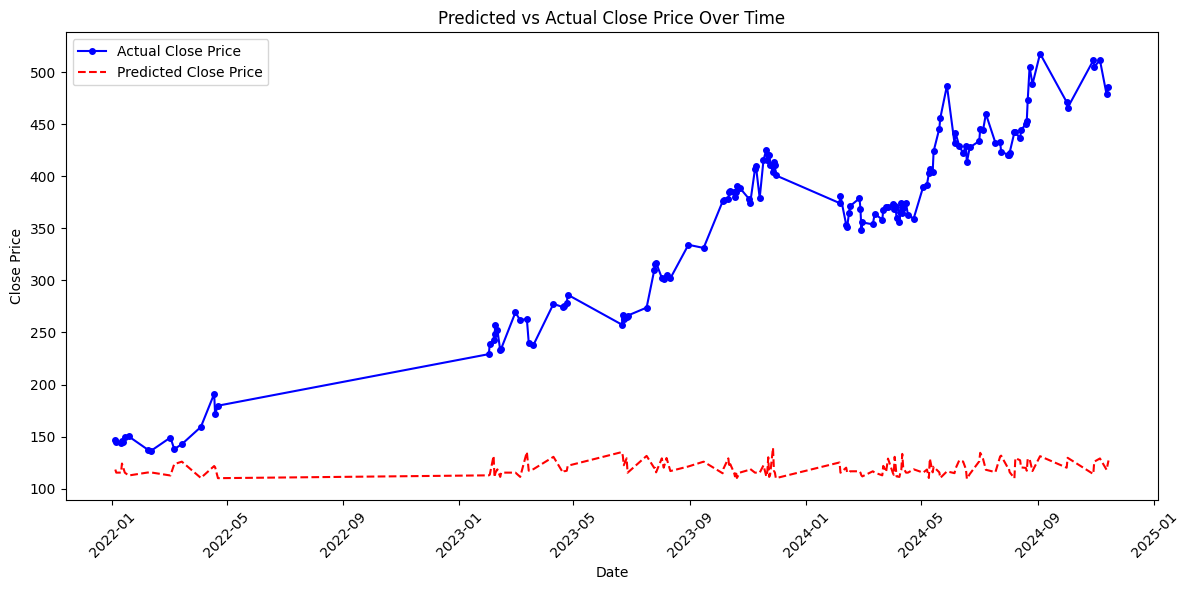

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the combined data
data = pd.read_csv('combined_data.csv')

# Convert the 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

# Step 2: Split the data into training (2002-2021) and testing (2022-2024) sets
train_data = data[data['DATE'].dt.year <= 2021]
test_data = data[data['DATE'].dt.year >= 2022]

# Step 3: Define the features (X) and target (y)
X_train = train_data[['PRECIPITATION', 'LOSS AREA']]
y_train = train_data['CLOSE PRICE']

X_test = test_data[['PRECIPITATION', 'LOSS AREA']]
y_test = test_data['CLOSE PRICE']

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Step 6: Apply the model to the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 7: Measure performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R-squared: {r2_rf}")

# Step 8: Plot Predicted vs Actual Close Price with Respect to Time
plt.figure(figsize=(12, 6))

# Plot actual close price vs time
plt.plot(test_data['DATE'], y_test, label='Actual Close Price', color='blue', marker='o', linestyle='-', markersize=4)

# Plot predicted close price vs time
plt.plot(test_data['DATE'], y_pred_rf, label='Predicted Close Price', color='red', linestyle='--', markersize=4)

# Add titles and labels
plt.title('Predicted vs Actual Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [4]:
correlation_matrix = data[['PRECIPITATION', 'LOSS AREA', 'CLOSE PRICE']].corr()
print(correlation_matrix)


               PRECIPITATION  LOSS AREA  CLOSE PRICE
PRECIPITATION       1.000000   0.019091    -0.015552
LOSS AREA           0.019091   1.000000     0.556408
CLOSE PRICE        -0.015552   0.556408     1.000000


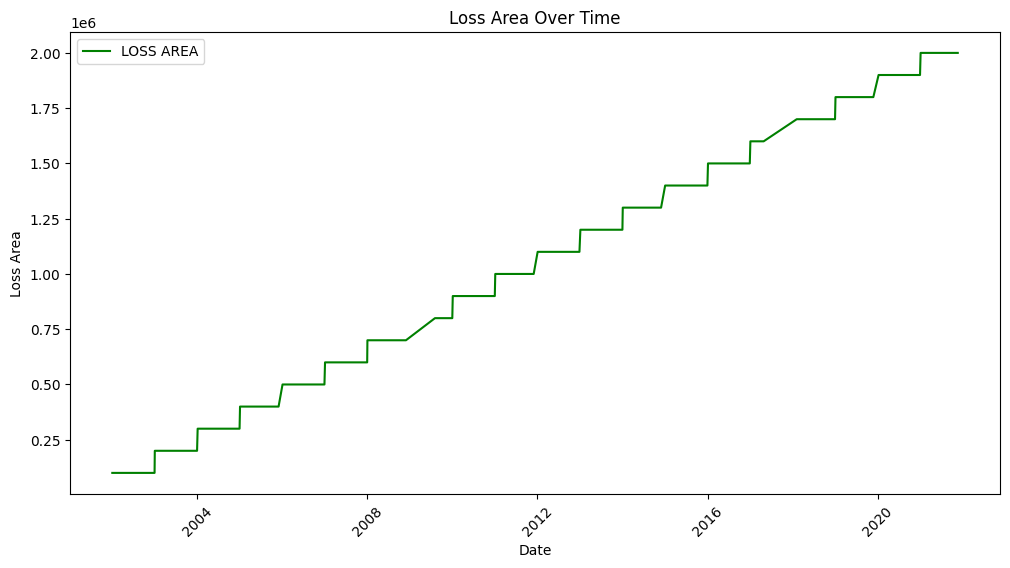

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['DATE'], train_data['LOSS AREA'], label='LOSS AREA', color='green')
plt.xlabel('Date')
plt.ylabel('Loss Area')
plt.title('Loss Area Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Random Forest MAE: 231.02690241957117
Random Forest R-squared: -5.657467685576923


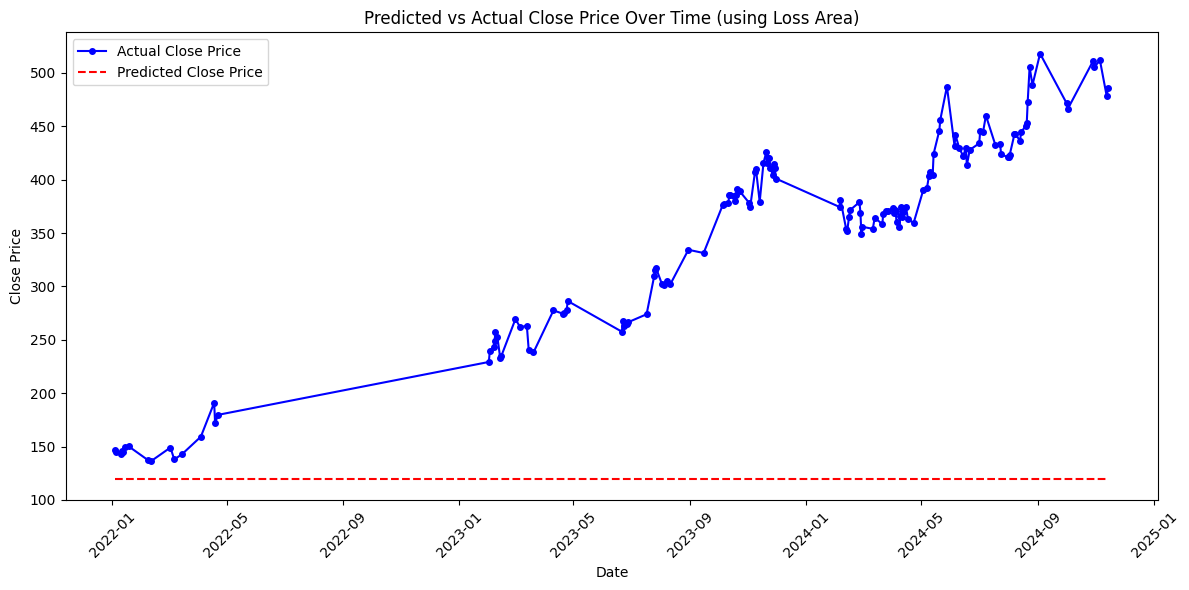

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the combined data
data = pd.read_csv('combined_data.csv')

# Convert the 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

# Step 2: Split the data into training (2002-2021) and testing (2022-2024) sets
train_data = data[data['DATE'].dt.year <= 2021]
test_data = data[data['DATE'].dt.year >= 2022]

# Step 3: Define the feature (X) and target (y) using only LOSS AREA
X_train = train_data[['LOSS AREA']]
y_train = train_data['CLOSE PRICE']

X_test = test_data[['LOSS AREA']]
y_test = test_data['CLOSE PRICE']

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Step 6: Apply the model to the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 7: Measure performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R-squared: {r2_rf}")

# Step 8: Plot Predicted vs Actual Close Price with Respect to Time
plt.figure(figsize=(12, 6))

# Plot actual close price vs time
plt.plot(test_data['DATE'], y_test, label='Actual Close Price', color='blue', marker='o', linestyle='-', markersize=4)

# Plot predicted close price vs time
plt.plot(test_data['DATE'], y_pred_rf, label='Predicted Close Price', color='red', linestyle='--', markersize=4)

# Add titles and labels
plt.title('Predicted vs Actual Close Price Over Time (using Loss Area)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.4 MB/s eta 0:01:50
   ---------------------------------------- 0.4/150.0 MB 8.1 MB/s eta 0:00:19
    --------------------------------------- 1.9/150.0 MB 20.6 MB/s eta 0:00:08
   - -------------------------------------- 4.5/150.0 MB 32.0 MB/s eta 0:00:05
   - -------------------------------------- 6.5/150.0 MB 37.8 MB/s eta 0:00:04
   -- ------------------------------------- 9.0/150.0 MB 41.1 MB/s eta 0:00:04
   -- ------------------------------------- 11.1/150.0 MB 54.7 MB/s eta 0:00:03
   --- ------------------------------------ 13.6/150.0 MB 59.5 MB/s eta 0:00:03
   ---- ----------------------------------- 16.0/150.0 MB 59.8 MB/s eta 0:00:03
   ---- ----------------------------------- 18.5/150.0 MB 59.5 MB/s eta 0:00:03
   ----- ---------------------------------- 20.5/150.0 MB 5


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Anshuman Bhardwaj\AppData\Local\Temp\ipykernel_27552\1075970605.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['LOG_LOSS_AREA'] = train_data['LOSS AREA'].apply(lambda x: np.log(x + 1))
C:\Users\Anshuman Bhardwaj\AppData\Local\Temp\ipykernel_27552\1075970605.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['LOG_LOSS_AREA'] = test_data['LOSS AREA'].apply(lambda x: np.log(x + 1))


XGBoost MAE: 230.19001022756916
XGBoost R-squared: -5.5424861541225665


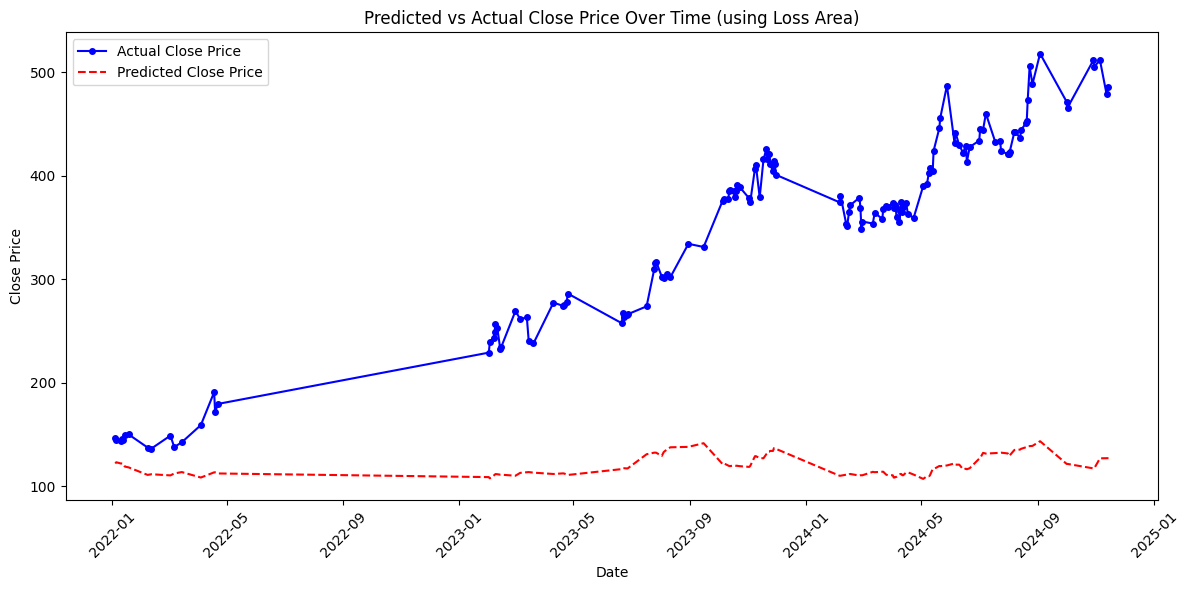

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb

# Load the combined data
data = pd.read_csv('combined_data.csv')

# Convert the 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

# Add time-based features
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month
data['DAYOFYEAR'] = data['DATE'].dt.dayofyear

# Split the data into training (2002-2021) and testing (2022-2024) sets
train_data = data[data['DATE'].dt.year <= 2021]
test_data = data[data['DATE'].dt.year >= 2022]

# Apply log transformation to Loss Area (to capture non-linearity)
train_data['LOG_LOSS_AREA'] = train_data['LOSS AREA'].apply(lambda x: np.log(x + 1))
test_data['LOG_LOSS_AREA'] = test_data['LOSS AREA'].apply(lambda x: np.log(x + 1))

# Define the feature and target
X_train = train_data[['LOG_LOSS_AREA', 'YEAR', 'MONTH', 'DAYOFYEAR']]
y_train = train_data['CLOSE PRICE']

X_test = test_data[['LOG_LOSS_AREA', 'YEAR', 'MONTH', 'DAYOFYEAR']]
y_test = test_data['CLOSE PRICE']

# Feature scaling (optional for XGBoost, but useful for other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")

# Plot Predicted vs Actual Close Price with Respect to Time
plt.figure(figsize=(12, 6))
plt.plot(test_data['DATE'], y_test, label='Actual Close Price', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(test_data['DATE'], y_pred_xgb, label='Predicted Close Price', color='red', linestyle='--', markersize=4)

plt.title('Predicted vs Actual Close Price Over Time (using Loss Area)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Anshuman Bhardwaj\AppData\Local\Temp\ipykernel_10148\255301707.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['LOG_LOSS_AREA'] = train_data['LOSS AREA'].apply(lambda x: np.log(x + 1))
C:\Users\Anshuman Bhardwaj\AppData\Local\Temp\ipykernel_10148\255301707.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['LOG_LOSS_AREA'] = test_data['LOSS AREA'].apply(lambda x: np.log(x + 1))


XGBoost MAE: 229.76039144437607
XGBoost R-squared: -5.520426609316772
Random Forest MAE: 229.17695496807363
Random Forest R-squared: -5.486697565895036


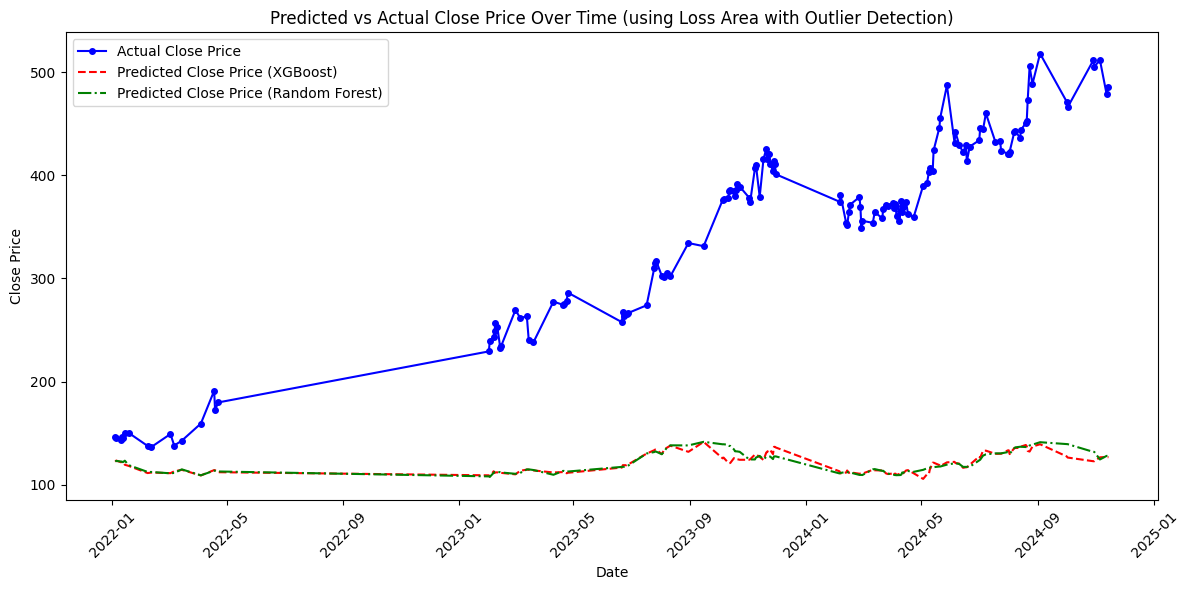

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import IsolationForest

# Load the combined data
data = pd.read_csv('combined_data.csv')

# Convert the 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

# Add time-based features
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month
data['DAYOFYEAR'] = data['DATE'].dt.dayofyear

# Step 1: Isolation Forest for Outlier Detection
# We will use LOSS AREA and precipitation-related features to detect outliers
features_for_outlier_detection = ['LOSS AREA', 'PRECIPITATION']  # You can add more features to this list

# Train Isolation Forest to identify outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # contamination is the proportion of outliers
outliers = iso_forest.fit_predict(data[features_for_outlier_detection])

# Label data points as normal (1) or abnormal (-1)
data['outlier'] = outliers
data['outlier'] = data['outlier'].apply(lambda x: 1 if x == 1 else 0)  # 1 for normal, 0 for outlier

# Step 2: Split the data into training (2002-2021) and testing (2022-2024) sets
train_data = data[data['DATE'].dt.year <= 2021]
test_data = data[data['DATE'].dt.year >= 2022]

# Apply log transformation to Loss Area (to capture non-linearity)
train_data['LOG_LOSS_AREA'] = train_data['LOSS AREA'].apply(lambda x: np.log(x + 1))
test_data['LOG_LOSS_AREA'] = test_data['LOSS AREA'].apply(lambda x: np.log(x + 1))

# Step 3: Define the feature and target
# Using 'LOG_LOSS_AREA', 'YEAR', 'MONTH', 'DAYOFYEAR', and the new 'outlier' column
X_train = train_data[['LOG_LOSS_AREA', 'YEAR', 'MONTH', 'DAYOFYEAR', 'outlier']]
y_train = train_data['CLOSE PRICE']
X_test = test_data[['LOG_LOSS_AREA', 'YEAR', 'MONTH', 'DAYOFYEAR', 'outlier']]
y_test = test_data['CLOSE PRICE']

# Feature scaling (optional for XGBoost, but useful for other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Step 5: Measure performance (XGBoost)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")

# Step 6: Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 7: Measure performance (Random Forest)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R-squared: {r2_rf}")

# Step 8: Plot Predicted vs Actual Close Price with Respect to Time
plt.figure(figsize=(12, 6))
plt.plot(test_data['DATE'], y_test, label='Actual Close Price', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(test_data['DATE'], y_pred_xgb, label='Predicted Close Price (XGBoost)', color='red', linestyle='--', markersize=4)
plt.plot(test_data['DATE'], y_pred_rf, label='Predicted Close Price (Random Forest)', color='green', linestyle='-.', markersize=4)

# Add titles and labels
plt.title('Predicted vs Actual Close Price Over Time (using Loss Area with Outlier Detection)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


XGBoost MAE: 0.04000861630435877
XGBoost R-squared: -0.2571364572049353
Random Forest MAE: 0.040362288235479465
Random Forest R-squared: -0.23666469709743798


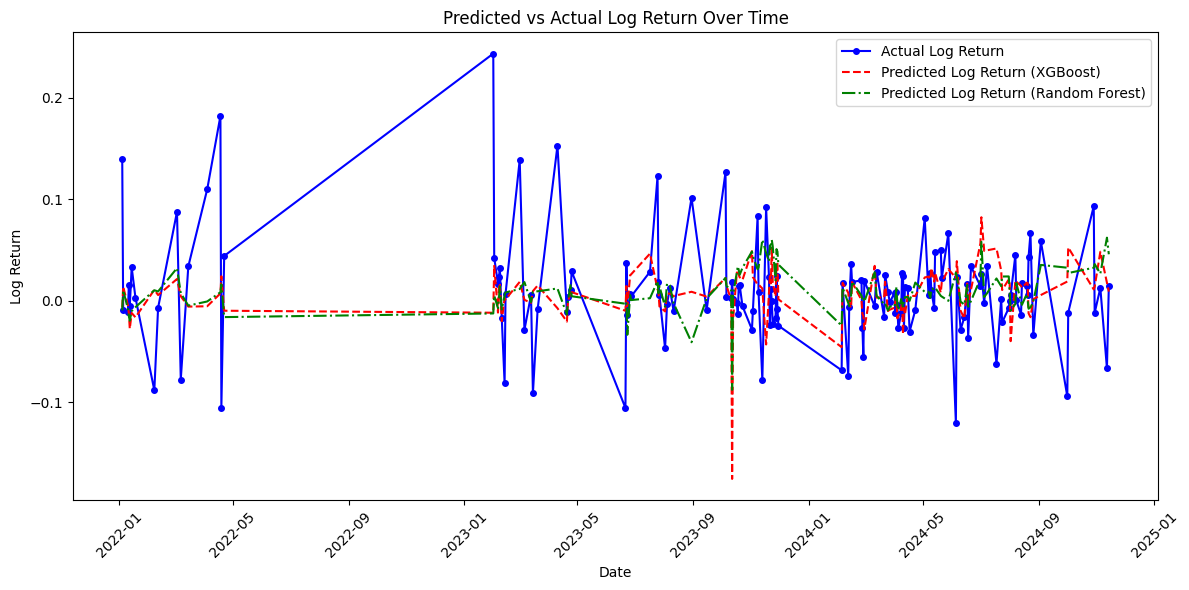

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import IsolationForest

# Load the combined data
data = pd.read_csv('combined_data.csv')

# Convert the 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')

# Add time-based features
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month
data['DAYOFYEAR'] = data['DATE'].dt.dayofyear

# Step 1: Isolation Forest for Outlier Detection
# We will use LOSS AREA and precipitation-related features to detect outliers
features_for_outlier_detection = ['LOSS AREA', 'PRECIPITATION']  # You can add more features to this list

# Train Isolation Forest to identify outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # contamination is the proportion of outliers
outliers = iso_forest.fit_predict(data[features_for_outlier_detection])

# Label data points as normal (1) or abnormal (-1)
data['outlier'] = outliers
data['outlier'] = data['outlier'].apply(lambda x: 1 if x == 1 else 0)  # 1 for normal, 0 for outlier

# Step 2: Logarithmic transformation of LOSS AREA and PRECIPITATION
data['LOG_LOSS_AREA'] = np.log(data['LOSS AREA'] + 1)  # Add 1 to avoid log(0) issues
data['LOG_PRECIPITATION'] = np.log(data['PRECIPITATION'] + 1)  # Log of precipitation

# Step 3: Calculate log return (target variable)
# Log return = ln(previous day's close / current day's close)
data['LOG_RETURN'] = np.log(data['CLOSE PRICE'] / data['CLOSE PRICE'].shift(1))

# Drop the first row (since it will have NaN log return)
data = data.dropna(subset=['LOG_RETURN'])

# Step 4: Split the data into training (2002-2021) and testing (2022-2024) sets
train_data = data[data['DATE'].dt.year <= 2021]
test_data = data[data['DATE'].dt.year >= 2022]

# Step 5: Define the feature and target
# Using 'LOG_LOSS_AREA', 'YEAR', 'MONTH', 'DAYOFYEAR', and 'LOG_PRECIPITATION', 'outlier'
X_train = train_data[['LOG_LOSS_AREA', 'YEAR', 'MONTH', 'DAYOFYEAR', 'LOG_PRECIPITATION', 'outlier']]
y_train = train_data['LOG_RETURN']
X_test = test_data[['LOG_LOSS_AREA', 'YEAR', 'MONTH', 'DAYOFYEAR', 'LOG_PRECIPITATION', 'outlier']]
y_test = test_data['LOG_RETURN']

# Feature scaling (optional for XGBoost, but useful for other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Step 7: Measure performance (XGBoost)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")

# Step 8: Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 9: Measure performance (Random Forest)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R-squared: {r2_rf}")

# Step 10: Plot Predicted vs Actual Log Return with Respect to Time
plt.figure(figsize=(12, 6))
plt.plot(test_data['DATE'], y_test, label='Actual Log Return', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(test_data['DATE'], y_pred_xgb, label='Predicted Log Return (XGBoost)', color='red', linestyle='--', markersize=4)
plt.plot(test_data['DATE'], y_pred_rf, label='Predicted Log Return (Random Forest)', color='green', linestyle='-.', markersize=4)

# Add titles and labels
plt.title('Predicted vs Actual Log Return Over Time')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
